Stephen FitzSimon

pandas series objects exercises

In [166]:
import pandas as pd
import matplotlib as plt

In [85]:
# make a series object
fruits = pd.Series(["kiwi", "mango", "strawberry", "pineapple", "gala apple", "honeycrisp apple", "tomato", "watermelon", "honeydew", "kiwi", "kiwi", "kiwi", "mango", "blueberry", "blackberry", "gooseberry", "papaya"])
fruits

0                 kiwi
1                mango
2           strawberry
3            pineapple
4           gala apple
5     honeycrisp apple
6               tomato
7           watermelon
8             honeydew
9                 kiwi
10                kiwi
11                kiwi
12               mango
13           blueberry
14          blackberry
15          gooseberry
16              papaya
dtype: object

# part I

In [86]:
#1. get the number of elements
fruits.size

17

In [87]:
#2. 
fruits.index

RangeIndex(start=0, stop=17, step=1)

In [88]:
# 3. 
fruits.values

array(['kiwi', 'mango', 'strawberry', 'pineapple', 'gala apple',
       'honeycrisp apple', 'tomato', 'watermelon', 'honeydew', 'kiwi',
       'kiwi', 'kiwi', 'mango', 'blueberry', 'blackberry', 'gooseberry',
       'papaya'], dtype=object)

In [89]:
#4. 
fruits.dtype

dtype('O')

In [90]:
#5.
fruits.head()

0          kiwi
1         mango
2    strawberry
3     pineapple
4    gala apple
dtype: object

In [91]:
fruits.tail(3)

14    blackberry
15    gooseberry
16        papaya
dtype: object

In [92]:
fruits.sample(2)

9          kiwi
4    gala apple
dtype: object

In [93]:
#6.
fruits.describe()

count       17
unique      13
top       kiwi
freq         4
dtype: object

In [94]:
#7.
fruits.unique()

array(['kiwi', 'mango', 'strawberry', 'pineapple', 'gala apple',
       'honeycrisp apple', 'tomato', 'watermelon', 'honeydew',
       'blueberry', 'blackberry', 'gooseberry', 'papaya'], dtype=object)

In [95]:
#8.
fruits.value_counts()

kiwi                4
mango               2
strawberry          1
pineapple           1
gala apple          1
honeycrisp apple    1
tomato              1
watermelon          1
honeydew            1
blueberry           1
blackberry          1
gooseberry          1
papaya              1
dtype: int64

In [96]:
#9.
fruit_counts = fruits.value_counts()
fruit_counts.nlargest(n=1)

kiwi    4
dtype: int64

In [97]:
#10.
fruit_counts.nsmallest(n=1, keep='all')

strawberry          1
pineapple           1
gala apple          1
honeycrisp apple    1
tomato              1
watermelon          1
honeydew            1
blueberry           1
blackberry          1
gooseberry          1
papaya              1
dtype: int64

# part II

In [98]:
# 1. Capitalize all the string values in fruits.
fruits.str.title()

0                 Kiwi
1                Mango
2           Strawberry
3            Pineapple
4           Gala Apple
5     Honeycrisp Apple
6               Tomato
7           Watermelon
8             Honeydew
9                 Kiwi
10                Kiwi
11                Kiwi
12               Mango
13           Blueberry
14          Blackberry
15          Gooseberry
16              Papaya
dtype: object

In [99]:
#2. Count the letter "a" in all the string values (use string vectorization).
fruits.str.count('a')

0     0
1     1
2     1
3     1
4     3
5     1
6     1
7     1
8     0
9     0
10    0
11    0
12    1
13    0
14    1
15    0
16    3
dtype: int64

In [100]:
#3. Output the number of vowels in each and every string value.
vowels = ['a', 'e', 'i', 'o', 'u']
vowel_counts = {'a':0, 'e':0, 'i':0, 'o':0, 'u':0}
for v in vowels:
    vowel_counts[v] = fruits.str.count(v).values.sum()
vowel_counts

{'a': 14, 'e': 15, 'i': 10, 'o': 9, 'u': 1}

In [101]:
#4 Write the code to get the longest string value from fruits.
max(fruits.values, key=len)

'honeycrisp apple'

In [102]:
#5 Write the code to get the string values with 5 or more letters in the name.
fruits[fruits.str.len() >= 5]

1                mango
2           strawberry
3            pineapple
4           gala apple
5     honeycrisp apple
6               tomato
7           watermelon
8             honeydew
12               mango
13           blueberry
14          blackberry
15          gooseberry
16              papaya
dtype: object

In [103]:
#6 Use the .apply method with a lambda function to find the fruit(s) 
# containing the letter "o" two or more times
contains_o = lambda s: True if s.count('o') >= 2 else False
fruits[fruits.apply(contains_o)]

6         tomato
15    gooseberry
dtype: object

In [104]:
#7 Write the code to get only the string values containing the substring "berry".
contains_berry = lambda s: True if s.find('berry') >= 0  else False
fruits[fruits.apply(contains_berry)]

2     strawberry
13     blueberry
14    blackberry
15    gooseberry
dtype: object

In [105]:
#8 Write the code to get only the string values containing the substring "apple".
contains_apple = lambda s: True if s.find('apple') >= 0  else False
fruits[fruits.apply(contains_apple)]

3           pineapple
4          gala apple
5    honeycrisp apple
dtype: object

In [132]:
# 9 is there are more pandas-centric method of doing this?
vowels = ['a', 'e', 'i', 'o', 'u']
vowel_count = sum([fruits.str.count(v) for v in vowels])
fruits[vowel_count.max()]

'honeycrisp apple'

# part III.a

In [107]:
letters = pd.Series(list('hnvidduckkqxwymbimkccexbkmqygkxoyndmcxnwqarhyffsjpsrabtjzsypmzadfavyrnndndvswreauxovncxtwzpwejilzjrmmbbgbyxvjtewqthafnbkqplarokkyydtubbmnexoypulzwfhqvckdpqtpoppzqrmcvhhpwgjwupgzhiofohawytlsiyecuproguy'))
letters

0      h
1      n
2      v
3      i
4      d
      ..
195    r
196    o
197    g
198    u
199    y
Length: 200, dtype: object

In [108]:
# 1. Which letter occurs the most frequently in the letters Series?
letters.value_counts().head(1)

y    13
dtype: int64

In [109]:
# 2. Which letter occurs the Least frequently?
letters.value_counts().tail(1)

l    4
dtype: int64

In [110]:
# 3. How many vowels are in the Series?

#make a lambda to determine the mask then count the masked series object
letters_count=letters.value_counts()
is_vowel = lambda char: True if char in ('a', 'e', 'i', 'o', 'u') else False
letters[letters.apply(is_vowel)].count()

34

In [111]:
# 4. How many consonants are in the Series?
is_consonant = lambda char: True if char not in ('a', 'e', 'i', 'o', 'u') else False
letters[letters.apply(is_consonant)].count()

166

In [112]:
# 5. Create a Series that has all of the same letters but uppercased.
upper_letters = letters.str.upper()
upper_letters

0      H
1      N
2      V
3      I
4      D
      ..
195    R
196    O
197    G
198    U
199    Y
Length: 200, dtype: object

In [152]:
# 6. Create a bar plot of the frequencies of the 6 most commonly occuring letters.

#get a list of the frequency
frequency_series = pd.Series(data=letters.value_counts().head(6))
frequency_series

y    13
p    12
w    10
b     9
n     9
k     9
dtype: int64

[Text(0.5, 0, 'Letter')]

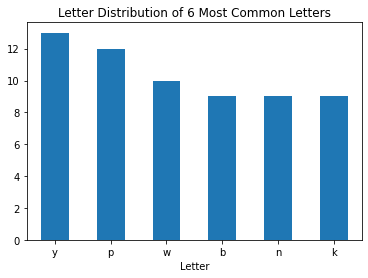

In [211]:
frequency_series.plot.bar(title='Letter Distribution of 6 Most Common Letters', rot=0).set(xlabel='Letter')

# part III.b

In [114]:
numbers = pd.Series(['$796,459.41', '$278.60', '$482,571.67', '$4,503,915.98', '$2,121,418.3', '$1,260,813.3','$87,231.01', '$1,509,175.45', '$4,138,548.00', '$2,848,913.80', '$594,715.39', '$4,789,988.17','$4,513,644.5', '$3,191,059.97', '$1,758,712.24', '$4,338,283.54', '$4,738,303.38','$2,791,759.67', '$769,681.94', '$452,650.23'])
numbers

0       $796,459.41
1           $278.60
2       $482,571.67
3     $4,503,915.98
4      $2,121,418.3
5      $1,260,813.3
6        $87,231.01
7     $1,509,175.45
8     $4,138,548.00
9     $2,848,913.80
10      $594,715.39
11    $4,789,988.17
12     $4,513,644.5
13    $3,191,059.97
14    $1,758,712.24
15    $4,338,283.54
16    $4,738,303.38
17    $2,791,759.67
18      $769,681.94
19      $452,650.23
dtype: object

In [115]:
# 1. What is the data type of the numbers Series?
numbers.dtype

dtype('O')

In [116]:
# 2. How many elements are in the number Series?
numbers.size

20

In [117]:
# 3. Perform the necessary manipulations by accessing Series attributes and methods to 
# convert the numbers Series to a numeric data type.
numbers = numbers.str.replace('$', '')
numbers = numbers.str.replace(',', '')
numbers = numbers.astype('float')
numbers

/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_54168/1721526582.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  numbers = numbers.str.replace('$', '')


0      796459.41
1         278.60
2      482571.67
3     4503915.98
4     2121418.30
5     1260813.30
6       87231.01
7     1509175.45
8     4138548.00
9     2848913.80
10     594715.39
11    4789988.17
12    4513644.50
13    3191059.97
14    1758712.24
15    4338283.54
16    4738303.38
17    2791759.67
18     769681.94
19     452650.23
dtype: float64

In [118]:
# 4. Run the code to discover the maximum value from the Series.

numbers.max()

4789988.17

In [119]:
# 5. Run the code to discover the minimum value from the Series.
numbers.min()

278.6

In [120]:
# 6. What is the range of the values in the Series?
numbers.max() - numbers.min()

4789709.57

In [121]:
# 7. Bin the data into 4 equally sized intervals or bins and output how many values fall into each bin.

binned_numbers = pd.cut(numbers, 4)
binned_numbers

0        (-4511.11, 1197705.993]
1        (-4511.11, 1197705.993]
2        (-4511.11, 1197705.993]
3      (3592560.778, 4789988.17]
4     (1197705.993, 2395133.385]
5     (1197705.993, 2395133.385]
6        (-4511.11, 1197705.993]
7     (1197705.993, 2395133.385]
8      (3592560.778, 4789988.17]
9     (2395133.385, 3592560.778]
10       (-4511.11, 1197705.993]
11     (3592560.778, 4789988.17]
12     (3592560.778, 4789988.17]
13    (2395133.385, 3592560.778]
14    (1197705.993, 2395133.385]
15     (3592560.778, 4789988.17]
16     (3592560.778, 4789988.17]
17    (2395133.385, 3592560.778]
18       (-4511.11, 1197705.993]
19       (-4511.11, 1197705.993]
dtype: category
Categories (4, interval[float64, right]): [(-4511.11, 1197705.993] < (1197705.993, 2395133.385] < (2395133.385, 3592560.778] < (3592560.778, 4789988.17]]

In [122]:
binned_numbers.value_counts()

(-4511.11, 1197705.993]       7
(3592560.778, 4789988.17]     6
(1197705.993, 2395133.385]    4
(2395133.385, 3592560.778]    3
dtype: int64

# do 8

<AxesSubplot:>

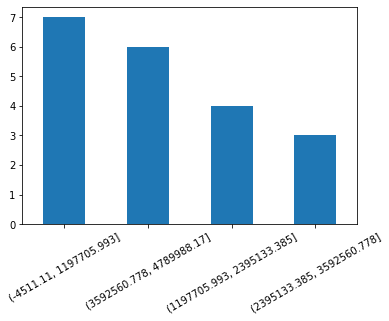

In [204]:
# 8. Plot the binned data in a meaningful way. Be sure to include a title and axis labels.
binned_numbers.value_counts().plot.bar(rot=30)

# part III.c

In [124]:
exam_scores = pd.Series([60, 86, 75, 62, 93, 71, 60, 83, 95, 78, 65, 72, 69, 81, 96, 80, 85, 92, 82, 78])
exam_scores

0     60
1     86
2     75
3     62
4     93
5     71
6     60
7     83
8     95
9     78
10    65
11    72
12    69
13    81
14    96
15    80
16    85
17    92
18    82
19    78
dtype: int64

In [125]:
# 1. How many elements are in the exam_scores Series?
exam_scores.size

20

In [126]:
# 2. Run the code to discover the minimum, the maximum, the mean, 
# and the median scores for the exam_scores Series.
exam_scores.describe()
#the 50% quantile is the median

count    20.000000
mean     78.150000
std      11.352139
min      60.000000
25%      70.500000
50%      79.000000
75%      85.250000
max      96.000000
dtype: float64

[Text(0.5, 0, 'Exam Score')]

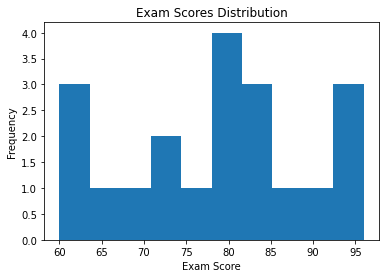

In [185]:
# 3. Plot the Series in a meaningful way and make sure your chart has a title and axis labels.
exam_scores.plot.hist(title = 'Exam Scores Distribution').set(xlabel='Exam Score')

In [160]:
# 4. Write the code necessary to implement a curve for your exam_grades Series and save this 
# as curved_grades. Add the necessary points to the highest grade to make it 100, and add the
# same number of points to every other score in the Series as well.

# get the max grade and subtract it from 100
curve_constant = 100 - exam_scores.max()
curved_grades = exam_scores + curve_constant
curved_grades.sort_values(ascending=False)

14    100
8      99
4      97
17     96
1      90
16     89
7      87
18     86
13     85
15     84
19     82
9      82
2      79
11     76
5      75
12     73
10     69
3      66
6      64
0      64
dtype: int64

In [162]:
# 5. Use a method to convert each of the numeric values in the curved_grades Series into a 
# categorical value of letter grades. For example, 86 should be a 'B' and 95 should be an 'A'. 
# Save this as a Series named letter_grades

#take the grade converter function from a previous assignment
def get_letter_grade(grade):
    #make a switch to return the proper grade
    if grade > 89 and grade <=100:
        return 'A'
    elif grade > 79 and grade <= 89:
        return 'B'
    elif grade > 69 and grade <= 79:
        return 'C'
    elif grade > 59 and grade <= 69:
        return 'D'
    else:
        return 'F'

letter_grades = exam_scores.apply(get_letter_grade)
letter_grades

0     D
1     B
2     C
3     D
4     A
5     C
6     D
7     B
8     A
9     C
10    D
11    C
12    D
13    B
14    A
15    B
16    B
17    A
18    B
19    C
dtype: object

A    4
B    6
C    5
D    5
dtype: int64

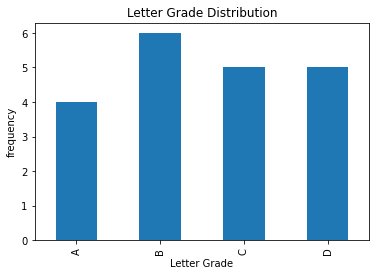

In [192]:
# 6. Plot your new categorical letter_grades Series in a meaninful way and include a title and axis labels.

grade_count = letter_grades.value_counts().sort_index()

grade_count.plot.bar(title = 'Letter Grade Distribution').set(xlabel = 'Letter Grade', ylabel='frequency')